In [185]:
import matplotlib.pyplot as plt
import numpy as np

def read_sensor_data(path):
    with open(path, 'r') as f:
        sensor_data = [d.replace('\n', '') for d in f.readlines()]
    return sensor_data

def analyse_sensor_data(sensor_data):
    sensors = []
    beacons = []

    for data_entry in sensor_data:
        data = data_entry.split(" ")
        sensor_x = int(data[2].split('=')[1].replace(':', '').replace(',', ''))
        sensor_y = int(data[3].split('=')[1].replace(':', '').replace(',', ''))
        beacon_x = int(data[8].split('=')[1].replace(':', '').replace(',', ''))
        beacon_y = int(data[9].split('=')[1].replace(':', '').replace(',', ''))

        distance = manhattan_distance((sensor_x, sensor_y), (beacon_x, beacon_y))
        
        sensor = {
            'x': sensor_x,
            'y': sensor_y,
            'coordinates': (sensor_x, sensor_y),
            'closest_beacon': (beacon_x, beacon_y),
            'distance': distance,
        }

        beacon = (beacon_x, beacon_y)
        if not beacon in beacons:
            beacons.append(beacon)

        sensors.append(sensor)

    return sensors, beacons

def draw_map(sensors, beacons, target_y=None):
    x_min = None
    x_max = None
    y_min = None
    y_max = None

    for beacon in beacons:
        x = beacon[0]
        y = beacon[1]
        if x_min is None or x < x_min:
            x_min = x
        if x_max is None or x > x_max:
            x_max = x
        if y_min is None or y < y_min:
            y_min = y
        if y_max is None or y > y_max:
            y_max = y

    for sensor in sensors:
        x = sensor['x']
        y = sensor['y']
        if x_min is None or x < x_min:
            x_min = x
        if x_max is None or x > x_max:
            x_max = x
        if y_min is None or y < y_min:
            y_min = y
        if y_max is None or y > y_max:
            y_max = y

    w = x_max - x_min + 1
    h = y_max - y_min + 1

    print(f'x_min: {x_min}')
    print(f'x_max: {x_max}')
    print(f'y_min: {y_min}')
    print(f'y_max: {y_max}')
    print(f'width: {w}')
    print(f'height: {h}')

    map = np.zeros((h, w, 3))

    if target_y is not None:
        target_y -= y_min

    for beacon in beacons:
        x = beacon[0] - x_min
        y = beacon[1] - y_min
        map[y][x] = [0.0, 0.0, 1.0]

    for sensor in sensors:
        x = sensor['x'] - x_min
        y = sensor['y'] - y_min
        map[y][x] = [1.0, 1.0, 0.0]

    for map_y in range(h):
        for map_x in range(w):
            if sum(map[map_y][map_x]) == 0:
                out_of_range = True
                x = map_x + x_min
                y = map_y + y_min
                for sensor in sensors:
                    if manhattan_distance((x, y), sensor['coordinates']) <= sensor['distance']:
                        out_of_range = False
                        break
                
                if not out_of_range:
                    map[map_y][map_x] = [0.2, 0.2, 0.2]

    fig = plt.figure(figsize=(20, 10))
    plt.imshow(map, cmap="gray", vmin=0, vmax=1)
    plt.xticks(range(0, w), range(x_min, x_max+1))
    plt.yticks(range(0, h), range(y_min, y_max+1))
    plt.show()

    if target_y is not None:
        pos_in_range = np.count_nonzero(map[target_y,:,0] == 0.2)
        print(f'{pos_in_range} positions in row {target_y+y_min} are in range of sensors. The beacon cannot be here!')

    return map

def manhattan_distance(p1, p2):
    return sum(abs((np.array(p1)-np.array(p2))))

def find_beacon(path, target_y=None):
    sensor_data = read_sensor_data(path)
    sensors, beacons = analyse_sensor_data(sensor_data)
    map = draw_map(sensors, beacons, target_y)



x_min: -2
x_max: 25
y_min: 0
y_max: 22
width: 28
height: 23


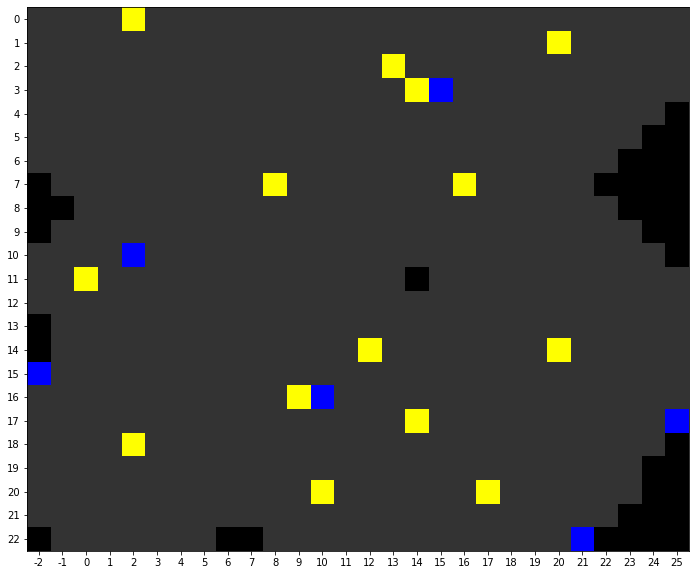

26 positions in row 10 are in range of sensors. The beacon cannot be here!
x_min: -362535
x_max: 3999326
y_min: -182407
y_max: 4176552
width: 4361862
height: 4358960


MemoryError: Unable to allocate 415. TiB for an array with shape (4358960, 4361862, 3) and data type float64

In [186]:
example = "./example.txt"
test = "./test.txt"

find_beacon(example, target_y=10)
find_beacon(test, target_y=2000000)